# evaluating recommender systems

A big part of why recommender systems are as much art as they are science is that it's difficult to measure how good they are.

There's a certain aesthetic quality to the results they give you and it's hard to say whether a person considers the recommendation to be good or not especially if you're developing your algorithms offline.

People have come up with a lot of different ways to measure the quality of a recommender system and often different measurements can be at odds with each other but let's go through the more popular metrics for recommender systems, as they all have their own uses.


# train/test

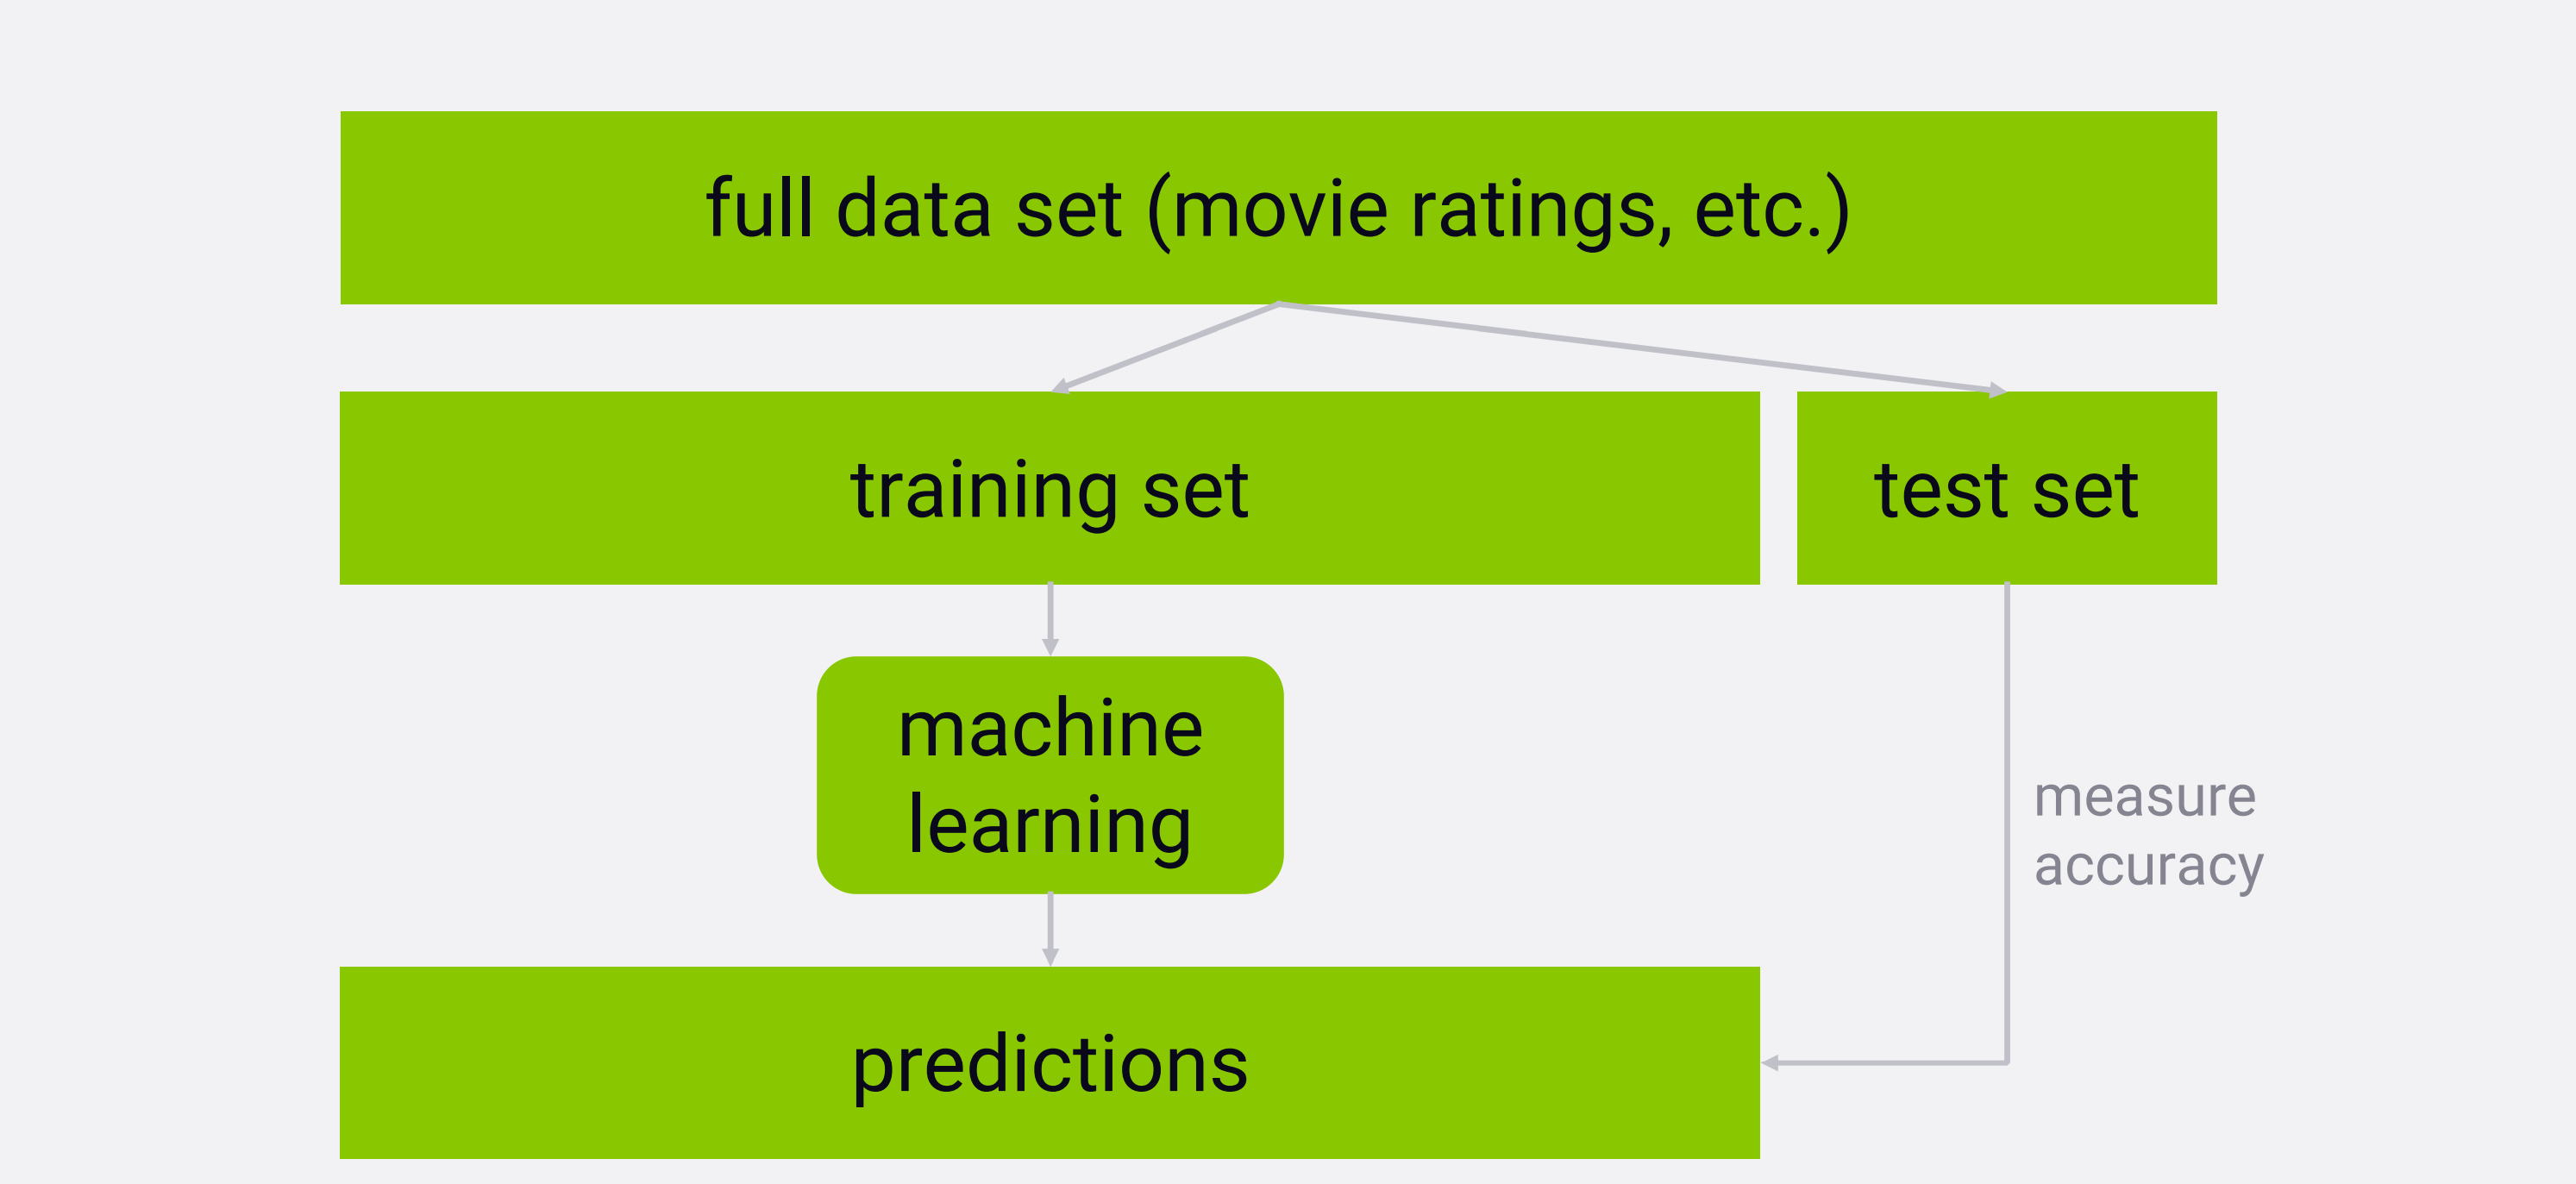

First, let's talk about the methodology for testing recommender systems offline. If you've done machine learning before you're probably familiar with the concept of train/test splits.

A recommender system is a machine learning system, you train it using prior user behavior and then use it to make predictions about items new users might like.

So on paper at least you can evaluate a recommender system just like any other machine learning system. Here's how it works, you measure your system's ability to predict how people rated things in the past but to keep it honest, you start by splitting up your ratings data into at training set and a testing set.

Usually the training set is bigger, say 80 or 90% of all of your data and you randomly assign ratings into one or the other so you train your recommender system using only the training data.

This is where it learns the relationships it needs between items or between users. Once it's trained you can ask it to make predictions about how a new user might rate some item they've never seen before.

So to measure how well it does we take the data we reserved for testing. These are ratings that our recommender system has never seen before so that keeps it from cheating.

Let's say one rating in our test set says that the user actually rated the movie Up five stars, we just ask the recommender system how it thinks this user would rate Up without telling it the answer and then we can measure how close it came to the real rating.

If you do this over enough people, you can end up with a meaningful number that tells you how good your recommender system is at recommending things or more specifically, recommending things people already watched and rated.

That's really all you can do if you can't test things out in an online system.

# k-fold cross-validation

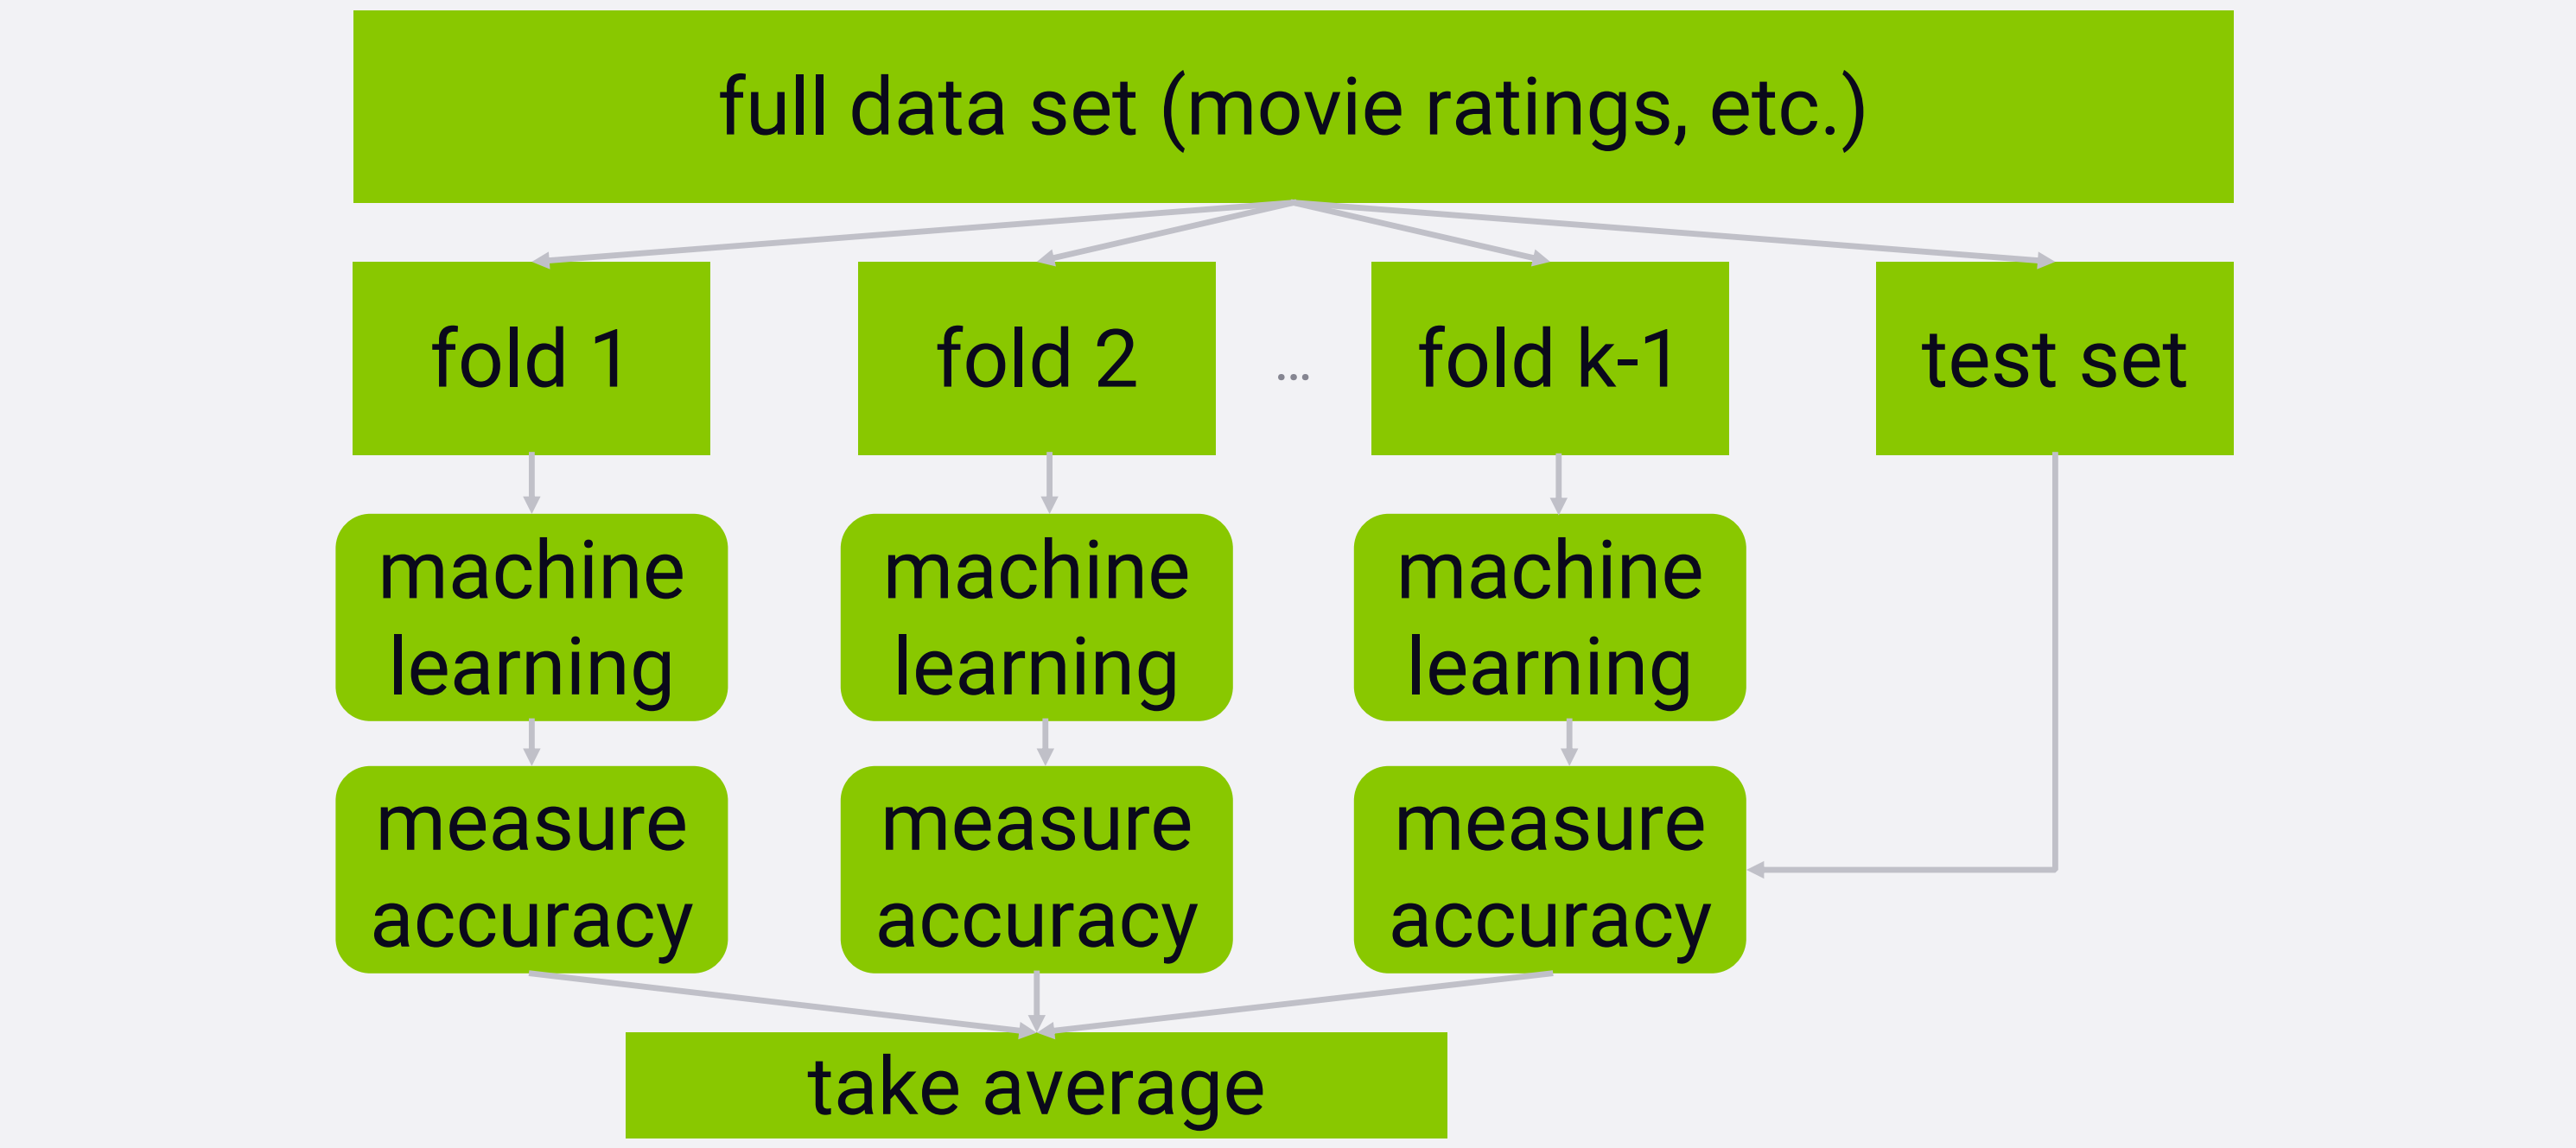
If you really want to get fancy, it's possible to improve on a single train/test split by using a technique called k-fold cross-validation. It's the same idea as train/test but instead of a single training set we create many randomly assigned training sets. 

Each individual training set, or fold, is used to train your recommender system independently and then we measure the accuracy of the resulting systems against your test set.

So we end up with a score of how accurately each fold ends up predicting user ratings and we can average them together. This obviously takes a lot more computing power to do but the advantage is that you don't end up over fitting to a single training set.

If your training data is small, you run the risk of optimizing for the ratings that are specifically in your training set instead of the test set so k-fold cross-validation provides some insurance against that and ensures that you create a recommender system that works for any set of ratings, not just the ones in the training set that you happen to choose.

**Here's the implemention of k-fold cross-validation accrording to [Surprise documentation](https://surprise.readthedocs.io/en/stable/model_selection.html?highlight=cross#cross-validation):**



In [ ]:
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-1m')

# Use the famous SVD algorithm.
algo = SVDpp()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Measuring Accuracy

To reiterate, train/test and k-fold cross-validation are ways to measure the accuracy of your recommender system that is, 
* how accurately you can predict
* how a user has rated movies they have already seen and provided a rating for
but that's an important point.

By using train/test all we can do is test our ability to predict how people rated movies they already saw. That's not the point of a recommender system. We want to recommend new things to people that they haven't seen but find interesting.

However, that's fundamentally impossible to test offline so researchers who can't just test out new algorithms on real people on Netflix or Amazon or whatever have to make due with approaches like this.


### Todo

- [ ] Accuracy metrics (RMSE and MAE) 
- [ ] Top-N hit rate Many ways 
- [ ] Coverage, diversity, and novelty 
- [ ] Churn, responsiveness, and A B tests
- [ ] Review ways to measure your recommender  

### Done ✓

- [x] Train test and cross-validation